Importing the libraries and reading the data 

In [202]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from math import exp

In [203]:
data=pd.read_csv("train.csv")

In [204]:
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Defining and Transposing dataset 


In [205]:
data = np.array(data)
m, n = data.shape
np.random.shuffle(data) # shuffle before splitting into dev and training sets

data_dev = data[0:1000].T
Y_dev = data_dev[0]
X_dev = data_dev[1:n]
X_dev = X_dev / 255.

data_train = data[1000:m].T
Y_train = data_train[0]
X_train = data_train[1:n]
X_train = X_train / 255.
_,m_train = X_train.shape

In [206]:
Y_train

array([6, 0, 2, ..., 1, 6, 6])

Forward Propogation


In [207]:
def init_params():
    W1 = np.random.normal(size=(10, 784)) * np.sqrt(1./(784))
    b1 = np.random.normal(size=(10, 1)) * np.sqrt(1./10)
    W2 = np.random.normal(size=(10, 10)) * np.sqrt(1./20)
    b2 = np.random.normal(size=(10, 1)) * np.sqrt(1./(784))
    return W1, b1, W2, b2
    return W1, b1, W2, b2

def ReLU(Z):
    return np.maximum(Z, 0)

def softmax(Z):
    A = np.exp(Z) / sum(np.exp(Z))
    return A
    
def forward_prop(W1, b1, W2, b2, X):
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2



Backward Propogation 

In [208]:
def ReLU_deriv(Z):
    return Z > 0
def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y

def backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y):
    one_hot_Y = one_hot(Y)
    dZ2 = A2 - one_hot_Y
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2)
    dZ1 = W2.T.dot(dZ2) * ReLU_deriv(Z1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1)
    return dW1, db1, dW2, db2

def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):   # Could use larger alpha so that model can make larger adjustments
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1    
    W2 = W2 - alpha * dW2  
    b2 = b2 - alpha * db2    
    return W1, b1, W2, b2

Gradient Descent

In [209]:

def get_predictions(A2):
    return np.argmax(A2, 0)

def get_accuracy(predictions, Y):
    print(predictions, Y)
    return np.sum(predictions == Y) / Y.size

def gradient_descent(X, Y, alpha, iterations):
    W1, b1, W2, b2 = init_params()
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        if i % 10 == 0:
            print("Iteration: ", i)
            predictions = get_predictions(A2)
            print(get_accuracy(predictions, Y))
    return W1, b1, W2, b2

In [210]:
W1, b1, W2, b2 = gradient_descent(X_train, Y_train, 0.10, 500)

Iteration:  0
[7 5 7 ... 5 7 7] [6 0 2 ... 1 6 6]
0.11970731707317073
Iteration:  10
[0 0 7 ... 7 6 7] [6 0 2 ... 1 6 6]
0.26353658536585367
Iteration:  20
[0 0 7 ... 7 0 7] [6 0 2 ... 1 6 6]
0.33126829268292685
Iteration:  30
[6 0 2 ... 7 6 6] [6 0 2 ... 1 6 6]
0.4497317073170732
Iteration:  40
[6 0 2 ... 1 6 6] [6 0 2 ... 1 6 6]
0.5889024390243902
Iteration:  50
[6 0 2 ... 1 6 6] [6 0 2 ... 1 6 6]
0.640609756097561
Iteration:  60
[6 0 2 ... 1 6 6] [6 0 2 ... 1 6 6]
0.6770243902439025
Iteration:  70
[6 0 2 ... 1 6 6] [6 0 2 ... 1 6 6]
0.7006341463414634
Iteration:  80
[6 0 2 ... 1 6 6] [6 0 2 ... 1 6 6]
0.7190731707317073
Iteration:  90
[6 0 2 ... 1 6 6] [6 0 2 ... 1 6 6]
0.7396829268292683
Iteration:  100
[6 0 2 ... 1 6 6] [6 0 2 ... 1 6 6]
0.7589756097560976
Iteration:  110
[6 0 2 ... 1 6 6] [6 0 2 ... 1 6 6]
0.7750243902439025
Iteration:  120
[6 0 2 ... 1 6 6] [6 0 2 ... 1 6 6]
0.7903902439024391
Iteration:  130
[6 0 2 ... 1 6 6] [6 0 2 ... 1 6 6]
0.8028536585365854
Iteration:  140

### Testing the model

In [211]:
def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_prop(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions

def test_prediction(index, W1, b1, W2, b2):
    current_image = X_train[:, index, None]
    prediction = make_predictions(X_train[:, index, None], W1, b1, W2, b2)
    label = Y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)
    
    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

### Examples

Prediction:  [6]
Label:  6


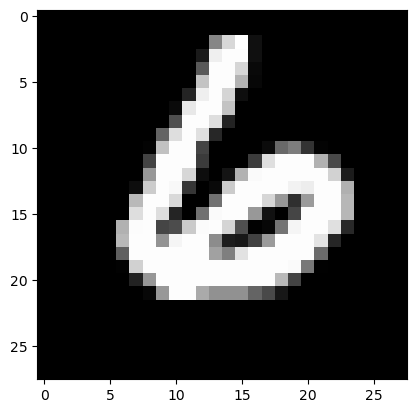

Prediction:  [0]
Label:  0


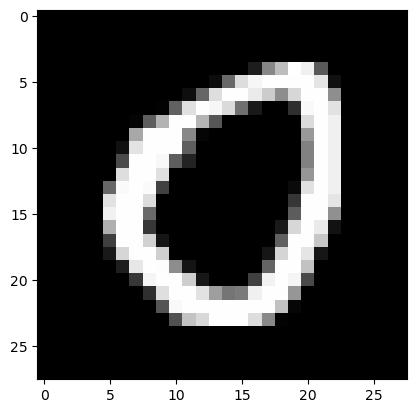

Prediction:  [2]
Label:  2


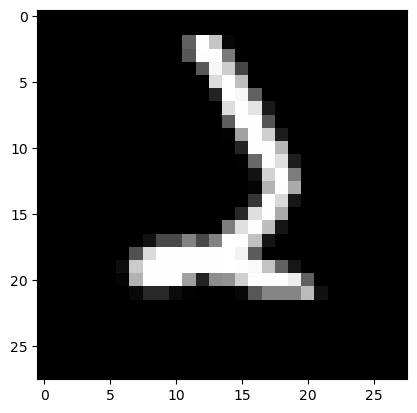

Prediction:  [8]
Label:  6


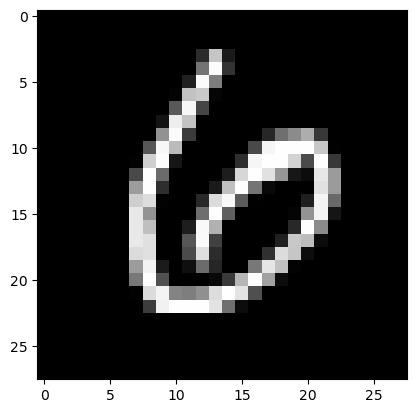

In [212]:
test_prediction(0, W1, b1, W2, b2)
test_prediction(1, W1, b1, W2, b2)
test_prediction(2, W1, b1, W2, b2)
test_prediction(3, W1, b1, W2, b2)

### Accuracy

In [213]:
dev_predictions = make_predictions(X_dev, W1, b1, W2, b2)
get_accuracy(dev_predictions, Y_dev)

[7 6 3 5 7 3 8 0 8 2 7 5 7 9 1 9 4 9 0 6 0 0 0 4 8 5 9 1 4 3 2 3 3 9 8 2 3
 6 0 8 2 4 0 3 3 3 6 6 5 4 0 7 7 8 5 1 7 7 8 2 6 7 8 4 7 8 1 7 4 1 2 8 7 1
 5 6 2 5 6 4 1 6 4 4 3 8 1 2 4 2 3 8 3 8 6 4 0 7 1 9 9 0 7 6 0 3 6 5 8 3 1
 1 0 3 5 6 0 9 9 8 9 6 1 0 2 2 4 1 5 6 4 4 4 2 4 5 8 1 1 1 9 7 1 2 3 0 4 3
 4 7 9 9 8 8 7 8 1 9 7 0 2 5 8 9 1 6 7 8 8 7 9 5 5 4 1 0 2 6 6 3 5 3 6 7 4
 7 4 1 0 3 9 4 3 6 5 1 9 7 9 1 0 0 6 4 5 4 7 7 9 0 5 4 9 8 1 5 6 4 0 2 4 3
 8 0 1 4 0 2 5 3 7 0 3 4 1 3 4 7 9 3 2 3 7 2 6 5 8 1 1 5 4 0 0 4 4 0 3 5 1
 5 2 2 8 4 8 2 9 6 6 5 2 9 6 7 3 5 5 7 7 7 6 8 2 6 7 3 8 3 5 2 9 5 3 8 4 6
 9 5 7 2 5 0 1 7 3 6 3 4 9 1 1 1 3 8 6 3 0 1 1 6 6 6 9 7 7 3 4 6 5 9 3 0 2
 1 7 5 9 5 7 3 5 5 6 0 1 8 9 0 9 5 9 1 3 6 0 4 6 1 6 0 6 7 7 2 3 2 3 8 4 9
 6 7 3 7 3 2 9 0 5 7 9 5 1 5 5 3 2 4 9 9 9 6 4 4 6 8 9 0 5 8 2 2 5 1 4 9 6
 7 7 1 2 9 0 2 8 9 8 6 5 0 9 3 4 8 3 6 5 7 2 8 8 4 7 5 7 7 2 3 2 6 5 7 2 1
 1 9 3 4 9 2 2 7 3 9 0 5 1 8 2 0 9 3 6 2 8 1 8 5 2 4 8 6 3 6 6 9 7 0 2 4 5
 7 8 8 0 1 5 7 4 9 5 8 1 

np.float64(0.894)

 # 89% accuracy, so our model generalized from the training data pretty well.